In [1]:
import numpy as np
import matplotlib.pyplot as plt
from starccato_flow.plotting.plotting import plot_loss, plot_individual_loss, create_snr_variation_gif
from starccato_flow.utils.defaults import TEN_KPC

/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


MPS device found


## Test Training/Validation Loss Plots

In [2]:
# Create dummy training and validation losses
# Simulate typical training: train loss decreases steadily, val loss decreases then plateaus
num_epochs = 200

# Training loss: exponential decay
train_losses = 2.0 * np.exp(-0.015 * np.arange(num_epochs)) + 0.1 + np.random.normal(0, 0.02, num_epochs)

# Validation loss: similar but with more noise and slight overfitting at the end
val_losses = 2.2 * np.exp(-0.012 * np.arange(num_epochs)) + 0.15 + np.random.normal(0, 0.04, num_epochs)
# Add slight uptick at end to simulate overfitting
val_losses[140:] += np.linspace(0, 0.05, len(val_losses[140:]))

print(f"Created {num_epochs} epochs of dummy loss data")
print(f"Train loss: {train_losses[0]:.3f} → {train_losses[-1]:.3f}")
print(f"Val loss: {val_losses[0]:.3f} → {val_losses[-1]:.3f}")

Created 200 epochs of dummy loss data
Train loss: 2.072 → 0.181
Val loss: 2.406 → 0.411


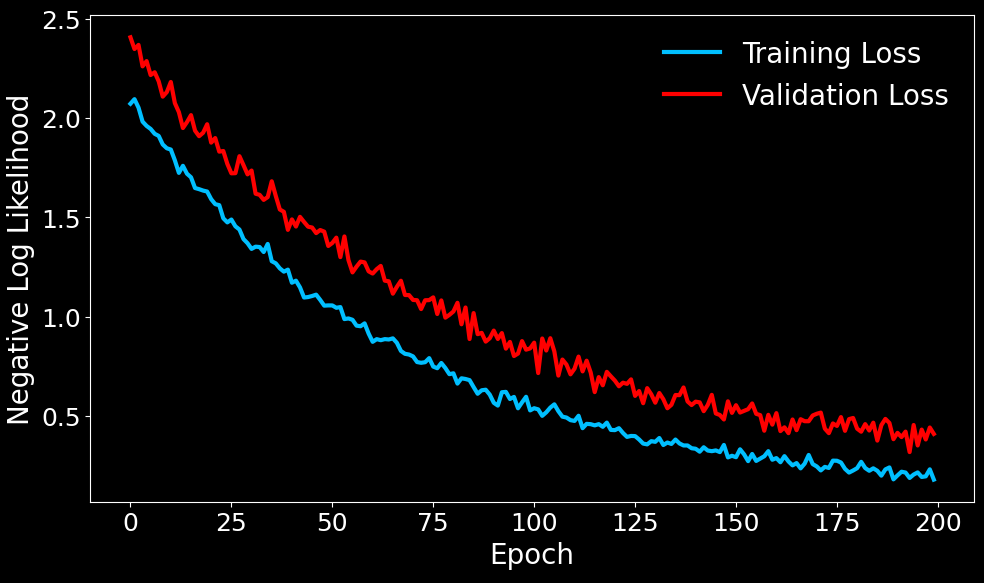

In [3]:
# Plot combined training and validation loss
plot_loss(
    train_losses=train_losses.tolist(),
    val_losses=val_losses.tolist(),
    background="black",
    font_family="sans-serif",
    font_name="Avenir"
)

## Test Individual Loss Components

In [4]:
# Create dummy individual loss components for VAE
# Total loss = reconstruction loss + KLD loss

# Reconstruction loss: dominant component, decreases quickly
reconstruction_losses = 1.8 * np.exp(-0.06 * np.arange(num_epochs)) + 0.08 + np.random.normal(0, 0.015, num_epochs)

# KLD loss: smaller component, regularization term
kld_losses = 0.3 * np.exp(-0.03 * np.arange(num_epochs)) + 0.05 + np.random.normal(0, 0.01, num_epochs)

# Total loss: sum of components
total_losses = reconstruction_losses + kld_losses

print(f"Reconstruction loss: {reconstruction_losses[0]:.3f} → {reconstruction_losses[-1]:.3f}")
print(f"KLD loss: {kld_losses[0]:.3f} → {kld_losses[-1]:.3f}")
print(f"Total loss: {total_losses[0]:.3f} → {total_losses[-1]:.3f}")

Reconstruction loss: 1.865 → 0.066
KLD loss: 0.356 → 0.038
Total loss: 2.222 → 0.105


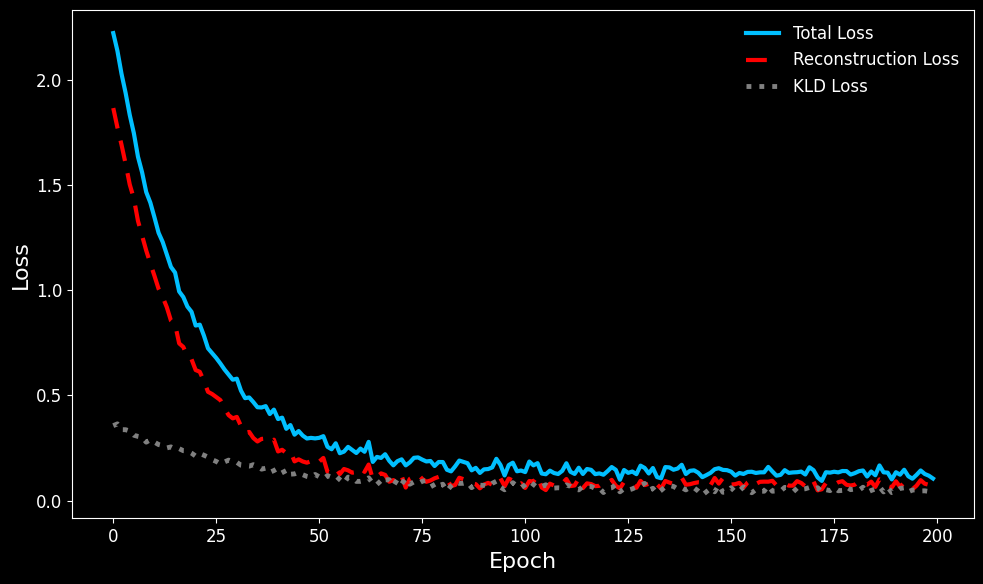

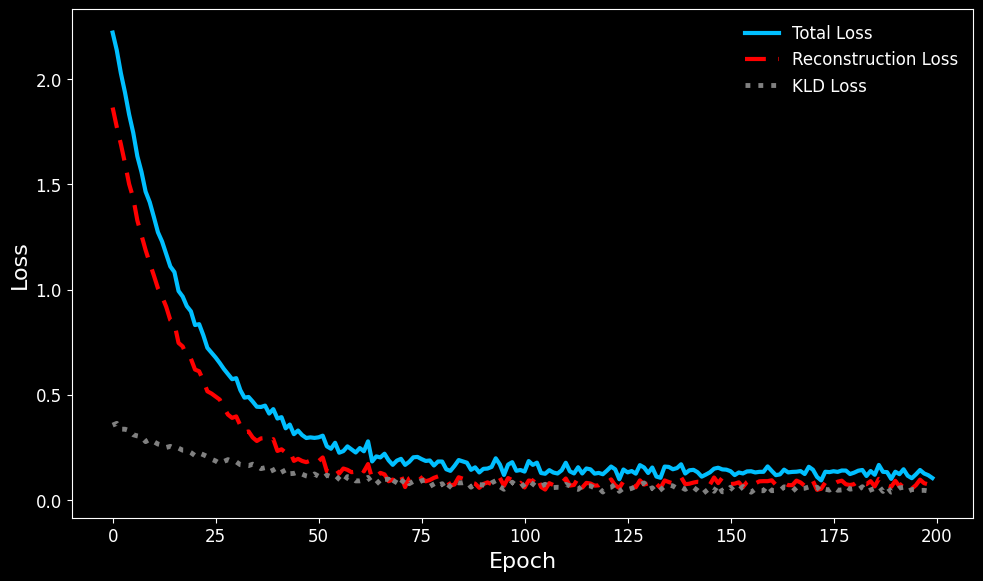

In [5]:
# Plot individual loss components
plot_individual_loss(
    total_losses=total_losses.tolist(),
    reconstruction_losses=reconstruction_losses.tolist(),
    kld_losses=kld_losses.tolist(),
    background="black",
    font_family="sans-serif",
    font_name="Avenir"
)

## Test with White Background

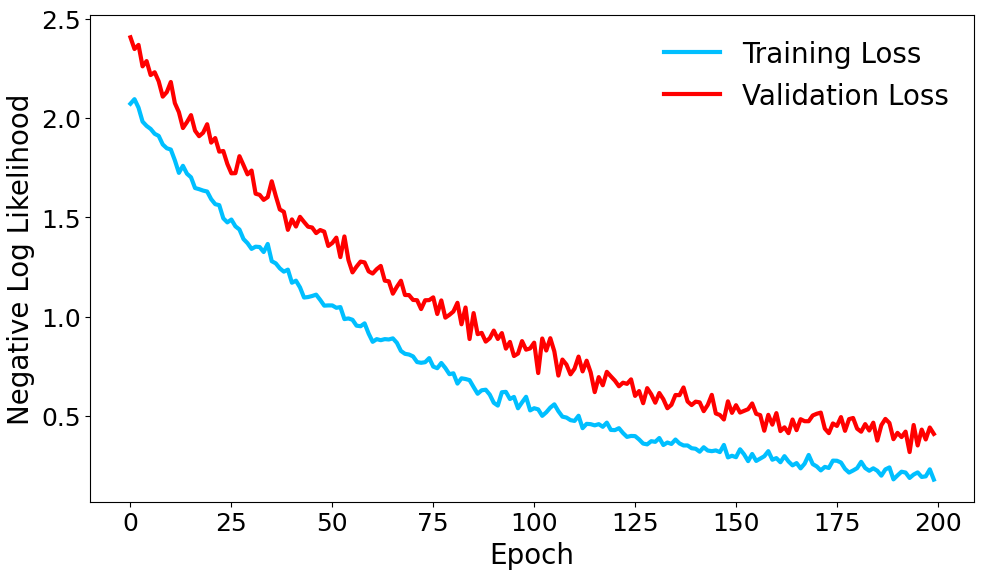

In [6]:
# Plot with white background
plot_loss(
    train_losses=train_losses.tolist(),
    val_losses=val_losses.tolist(),
    background="white",
    font_family="sans-serif",
    font_name="Avenir"
)

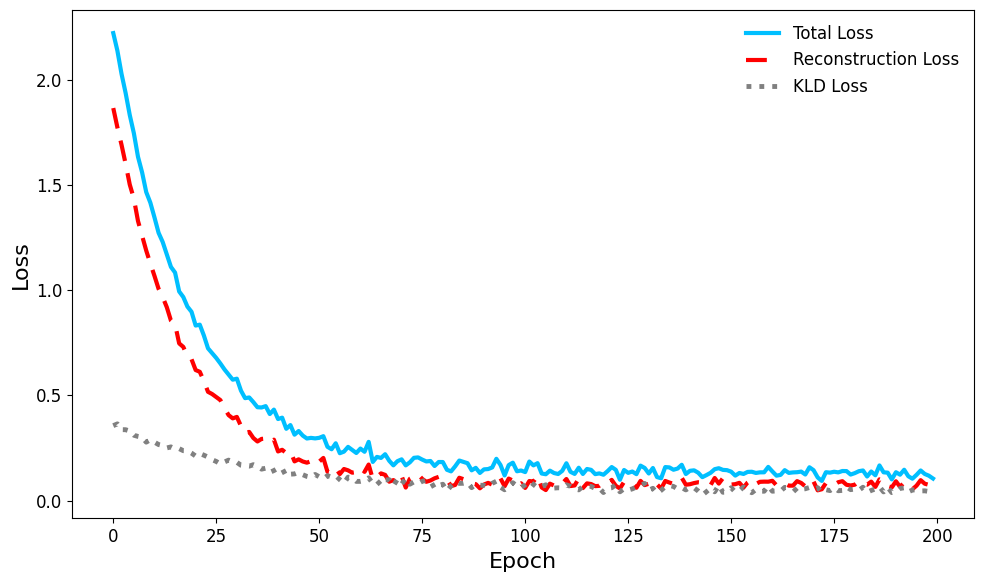

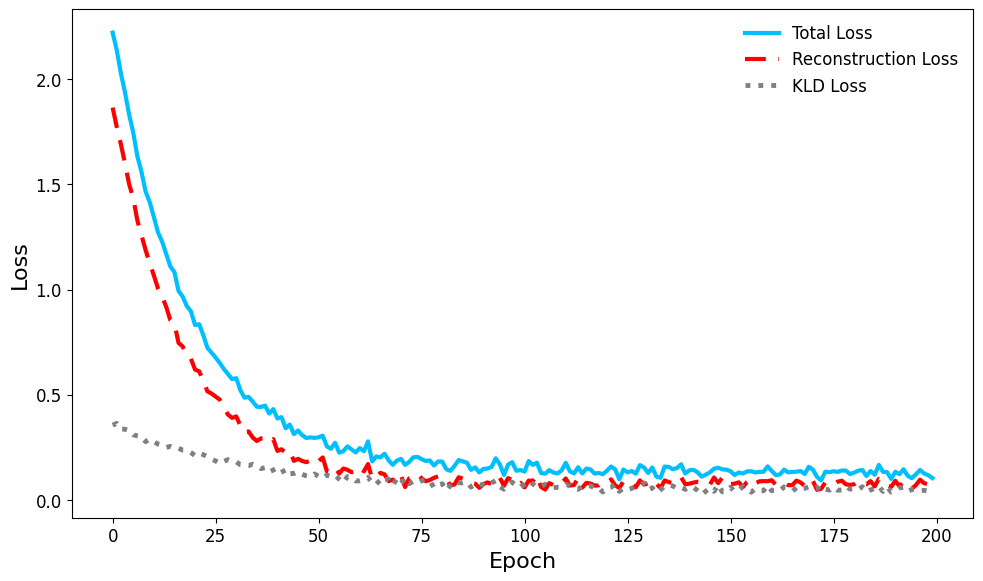

In [7]:
# Plot individual components with white background
plot_individual_loss(
    total_losses=total_losses.tolist(),
    reconstruction_losses=reconstruction_losses.tolist(),
    kld_losses=kld_losses.tolist(),
    background="white",
    font_family="sans-serif",
    font_name="Avenir"
)

## Test Corner Plot

In [8]:
import corner
import math
from starccato_flow.plotting.plotting_defaults import SIGNAL_COLOUR, GENERATED_SIGNAL_COLOUR

# Generate dummy posterior samples for 4 parameters
# Parameters: beta_ic_b, omega_0, log(A), Ye_b_c
num_samples = 5000

# Create correlated samples to simulate realistic posteriors
# True values we'll aim for:
# beta_ic_b = 0.15, omega_0 = 10, A = 2000 (log(A) ~ 7.6), Ye_b_c = 0.2

# Generate samples with some spread around true values
beta_samples = np.random.normal(0.15, 0.02, num_samples)
omega_samples = np.random.normal(10, 1.5, num_samples)
log_A_samples = np.random.normal(math.log(2000), 0.3, num_samples)
Ye_samples = np.random.normal(0.2, 0.03, num_samples)

# Clip to reasonable ranges
beta_samples = np.clip(beta_samples, 0.0, 0.25)
omega_samples = np.clip(omega_samples, 0, 16)
log_A_samples = np.clip(log_A_samples, 0, math.log(10000))
Ye_samples = np.clip(Ye_samples, 0, 0.3)

# Combine into samples array
samples = np.column_stack([beta_samples, omega_samples, log_A_samples, Ye_samples])

# True parameter values
true_params = np.array([0.15, 10, math.log(2000), 0.2])

print(f"Generated {num_samples} posterior samples")
print(f"True parameters:")
print(f"  beta_ic_b = {true_params[0]:.3f}")
print(f"  omega_0 = {true_params[1]:.1f}")
print(f"  log(A) = {true_params[2]:.3f} (A = {np.exp(true_params[2]):.0f})")
print(f"  Ye_b_c = {true_params[3]:.3f}")

Generated 5000 posterior samples
True parameters:
  beta_ic_b = 0.150
  omega_0 = 10.0
  log(A) = 7.601 (A = 2000)
  Ye_b_c = 0.200


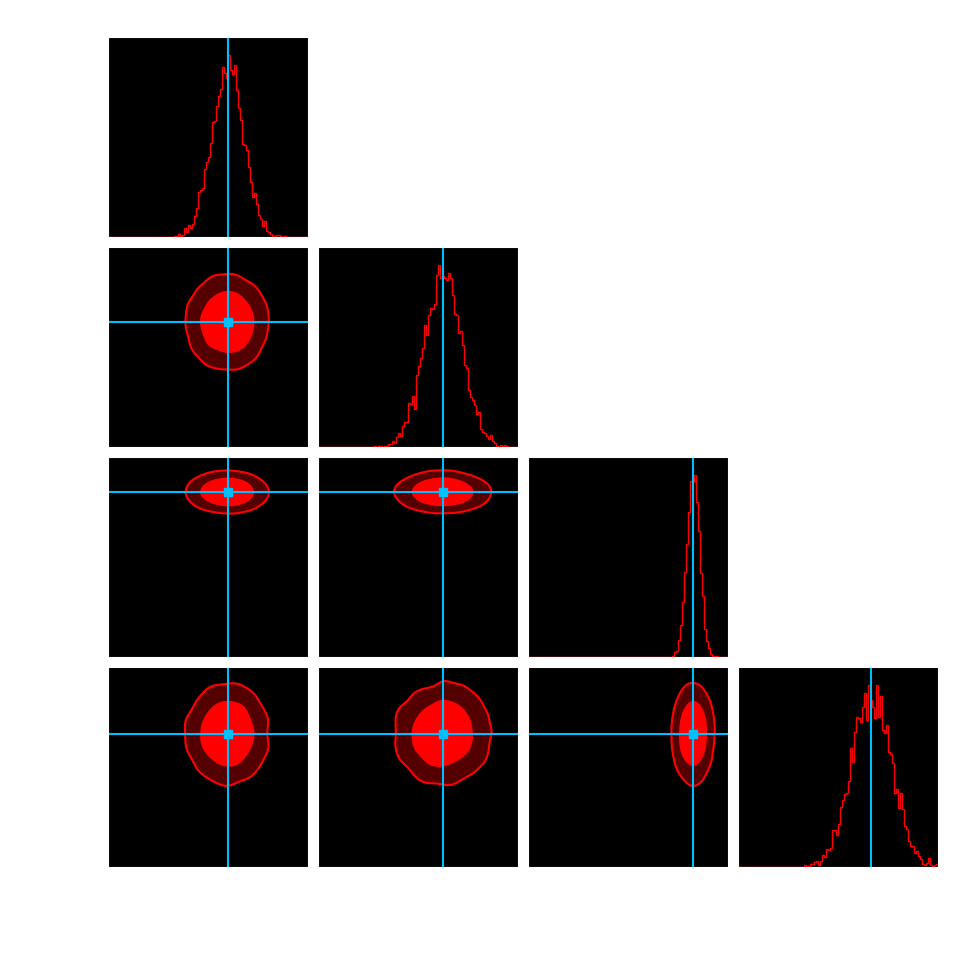

In [9]:
# Create corner plot with black background
# Note: This replicates the styling from plot_corner in plotting.py
# plot_corner itself requires trained VAE and Flow models

plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['savefig.facecolor'] = 'none'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

figure = corner.corner(
    samples,
    labels=[
        r"$\beta_{ic,b}$",
        r"$\omega_0$",
        r"$log(A)$",
        r"$Ye_{b,c}$",
    ],
    range=[(0, 0.25), (0, 16), (0, math.log(10000)), (0, 0.3)],
    truths=true_params,
    truth_color=SIGNAL_COLOUR,
    show_titles=True,
    title_quantiles=[0.16, 0.5, 0.84],
    title_fmt='.4f',
    title_kwargs={'fontsize': 14},  # Summary text (matches plot_corner)
    label_kwargs={'fontsize': 24},  # Parameter names (matches plot_corner)
    bins=100,
    smooth=3,
    color=GENERATED_SIGNAL_COLOUR,
    hist_kwargs={'density': False, 'alpha': 1.0},
    levels=(0.68, 0.95),
    fill_contours=True,
    plot_datapoints=False
)

# Fill hist patches to white
for ax in figure.get_axes():
    for patch in ax.patches:
        patch.set_facecolor("white")
        patch.set_alpha(1.0)

# Make axis lines white and adjust tick labels
for ax in figure.get_axes():
    for spine in ax.spines.values():
        spine.set_edgecolor('white')
    ax.tick_params(labelsize=12)  # Axis numbers (matches plot_corner)
    ax.xaxis.labelpad = 2
    ax.yaxis.labelpad = 2

# Reduce spacing between subplots
figure.subplots_adjust(hspace=0.05, wspace=0.05)

plt.show()
plt.rcdefaults()

## Test Signal Grid (2x4 Layout)

In [ ]:
# Load the CCSN dataset to get real signals
from starccato_flow.data.ccsn_data import CCSNSNRData
from starccato_flow.plotting.plotting import plot_signal_grid

# Create a small dataset instance (no noise for cleaner signals)
dataset = CCSNSNRData(
    batch_size=32,
    noise=False,
    curriculum=True,
    multi_param=True,
    noise_realizations=1
)

print(f"Dataset loaded with {len(dataset)} signals")
print(f"Max strain value: {dataset.max_strain:.2e}")
print(f"Signal shape: {dataset.signals.shape}")

Dataset loaded with 1684 signals
Max strain value: 6.56e+02
Signal shape: (256, 1684)


In [11]:
# Select 8 signals for 2x4 grid
num_signals = 8
selected_signals = []

dataset.set_snr(20)

for i in range(num_signals):
    # Get signal from dataset (index 1 is the noisy signal, but we set noise=False so it's clean)
    signal = dataset.__getitem__(i + 50)[0].cpu().numpy().flatten()
    selected_signals.append(signal)

# Convert to numpy array
selected_signals = np.array(selected_signals)

print(f"Selected {len(selected_signals)} signals")
print(f"Each signal shape: {selected_signals[0].shape}")

Selected 8 signals
Each signal shape: (256,)


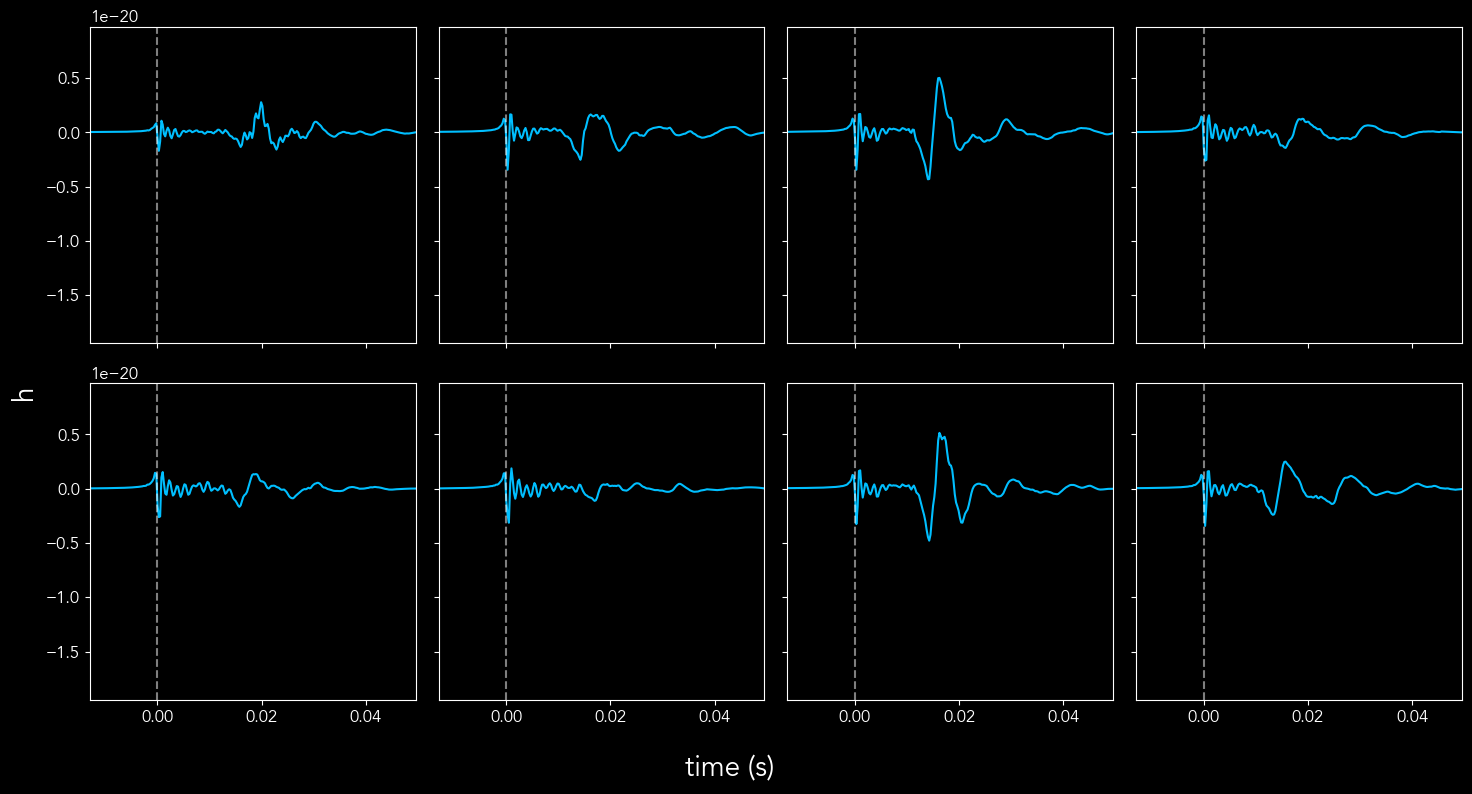

(<Figure size 1500x800 with 8 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >], dtype=object))

In [12]:
# Plot 2x4 grid with black background
from starccato_flow.plotting.plotting import plot_signal_grid
plot_signal_grid(
    signals=selected_signals/TEN_KPC,
    noisy_signals=None,
    max_value=dataset.max_strain,
    num_cols=4,
    num_rows=2,
    fname=None,
    background="black",
    generated=False,
    font_family="sans-serif",
    font_name="Avenir",
)

## Test Signal Grid GIF Animation

Creating 15 frames for GIF animation...


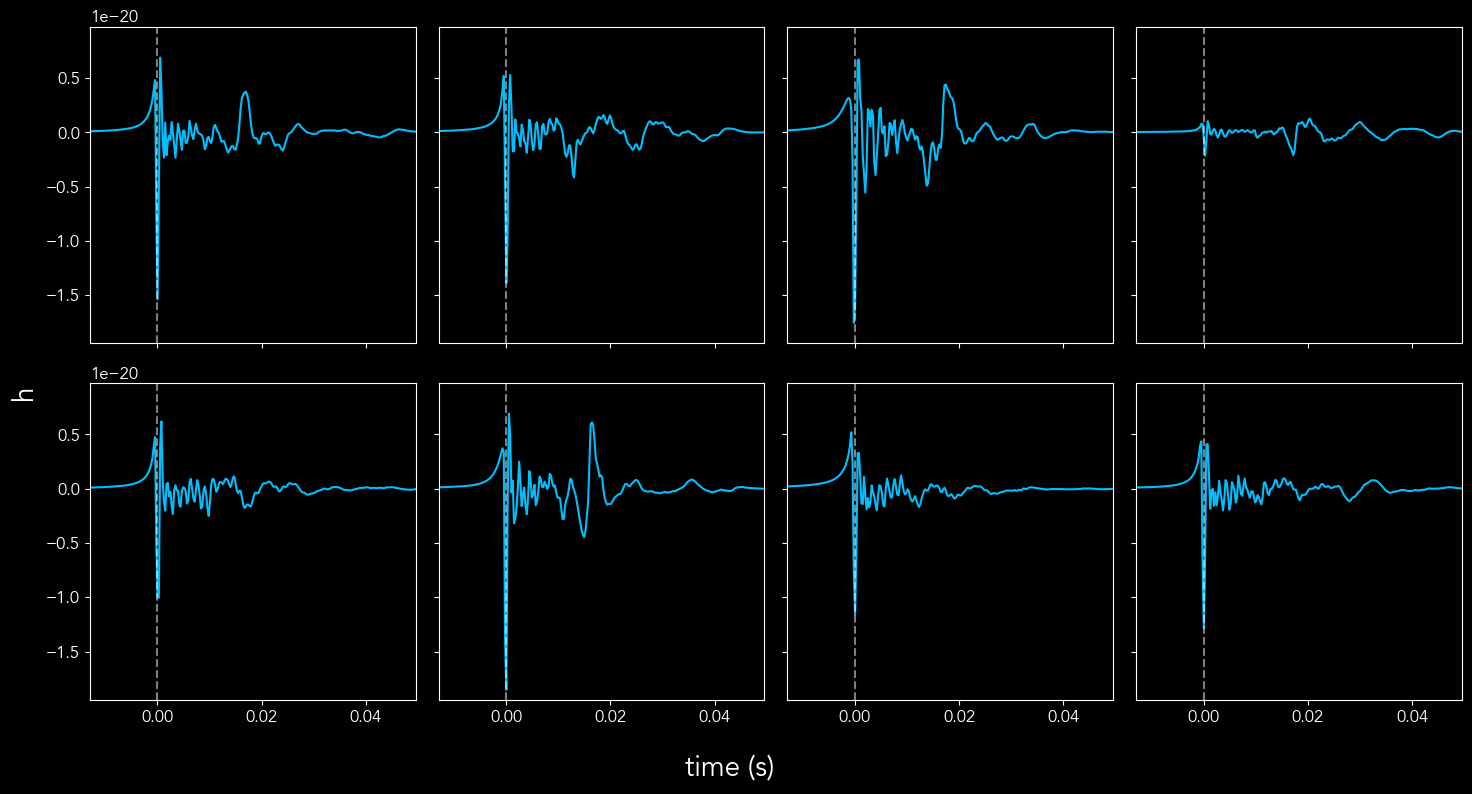

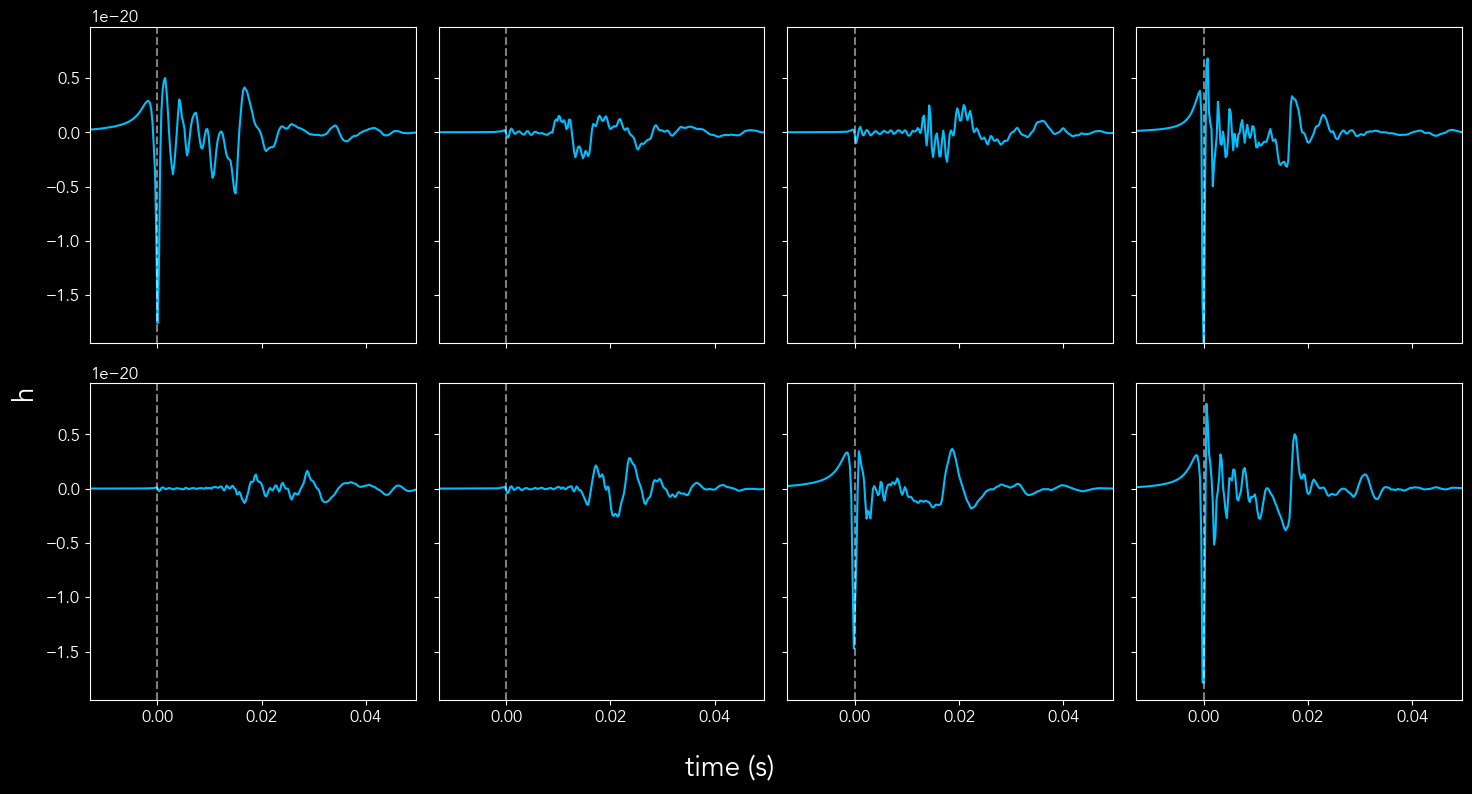

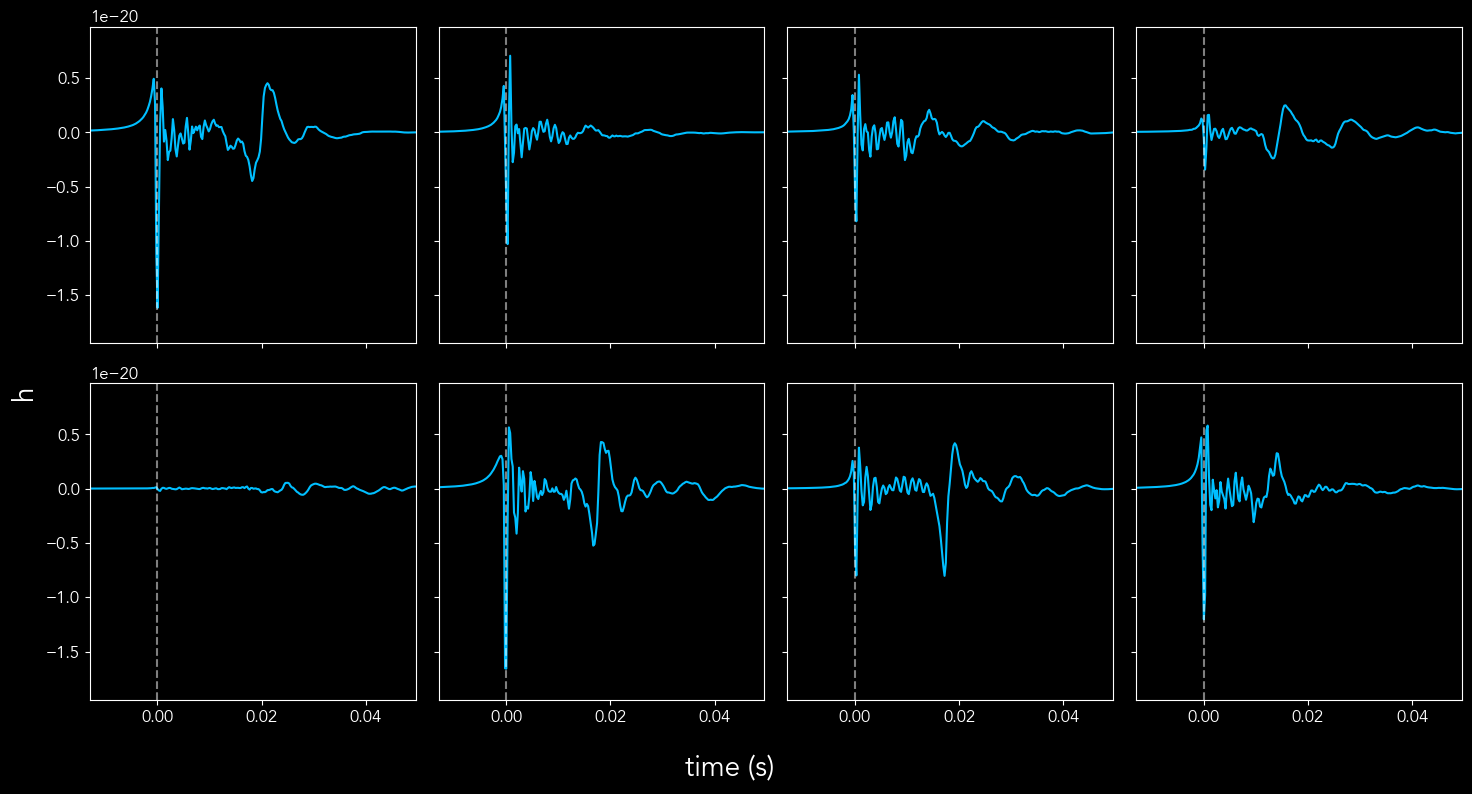

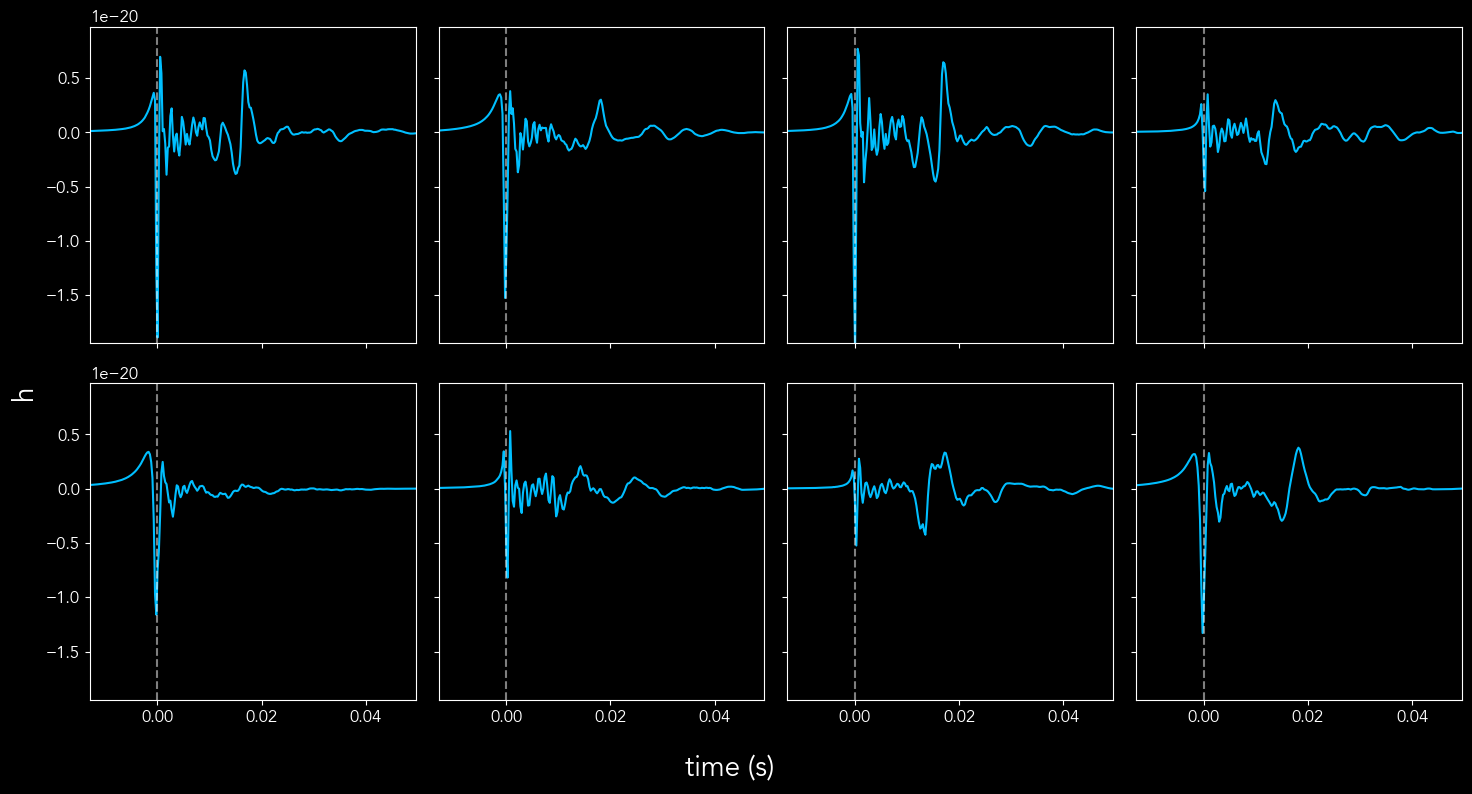

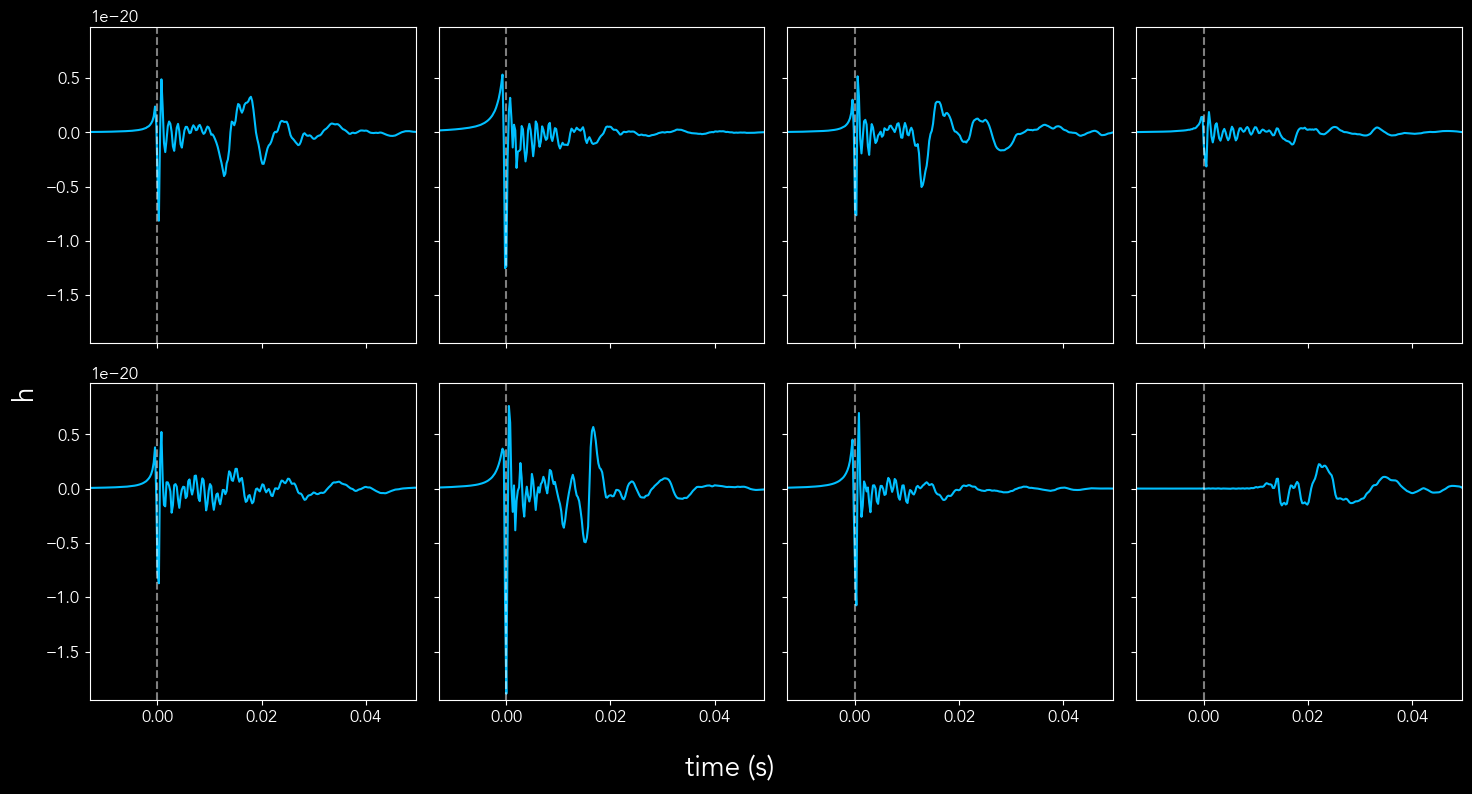

  Generated 5/15 frames


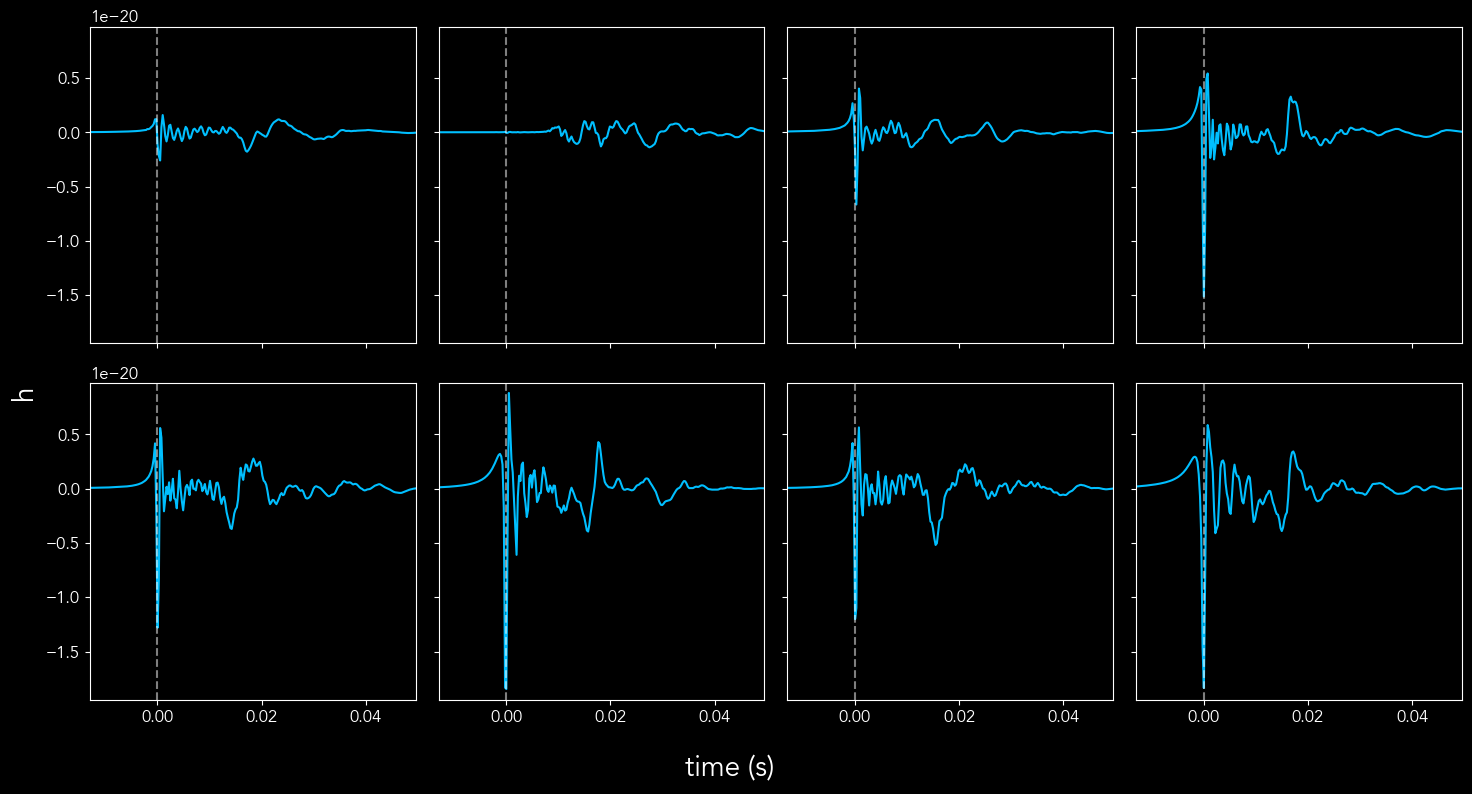

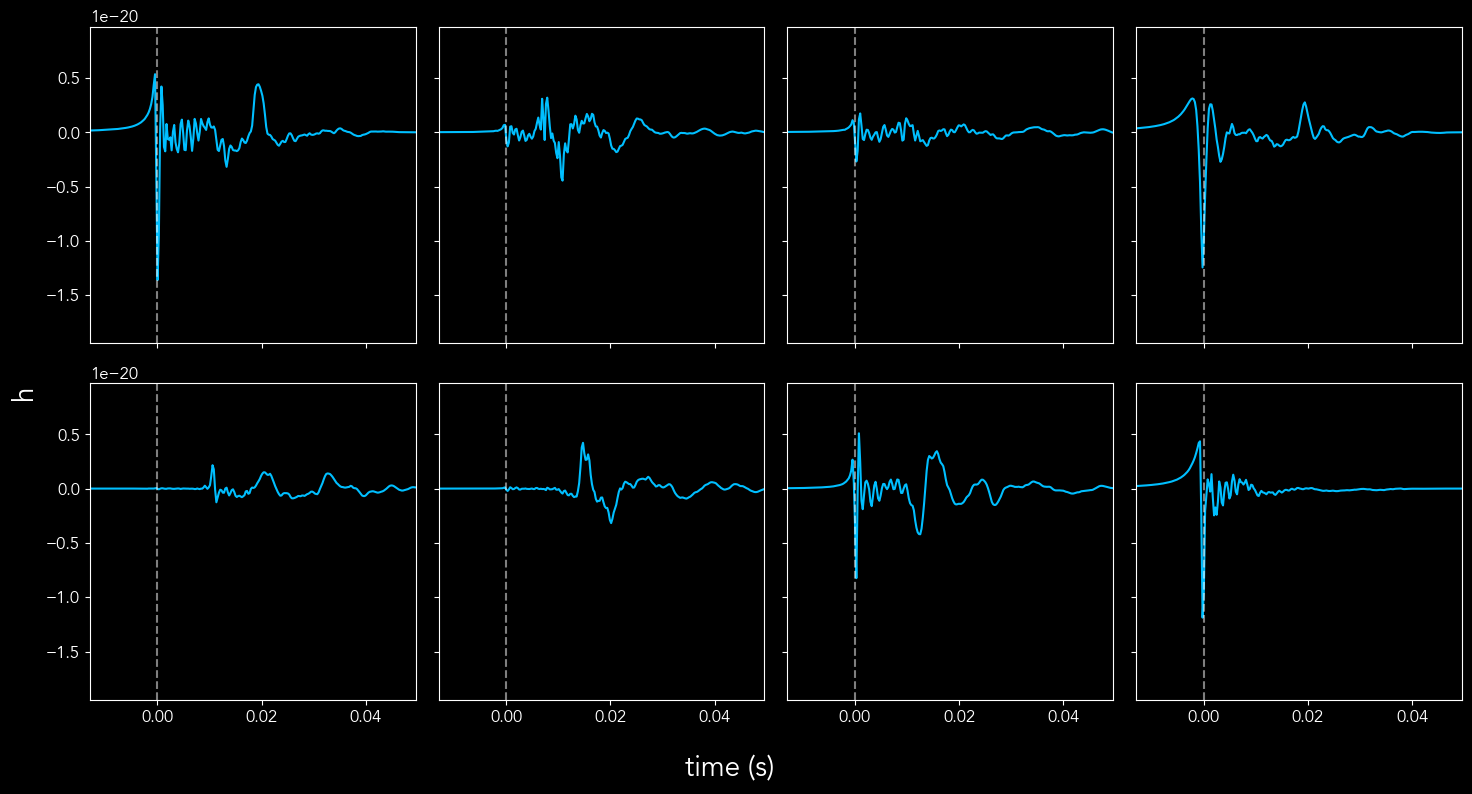

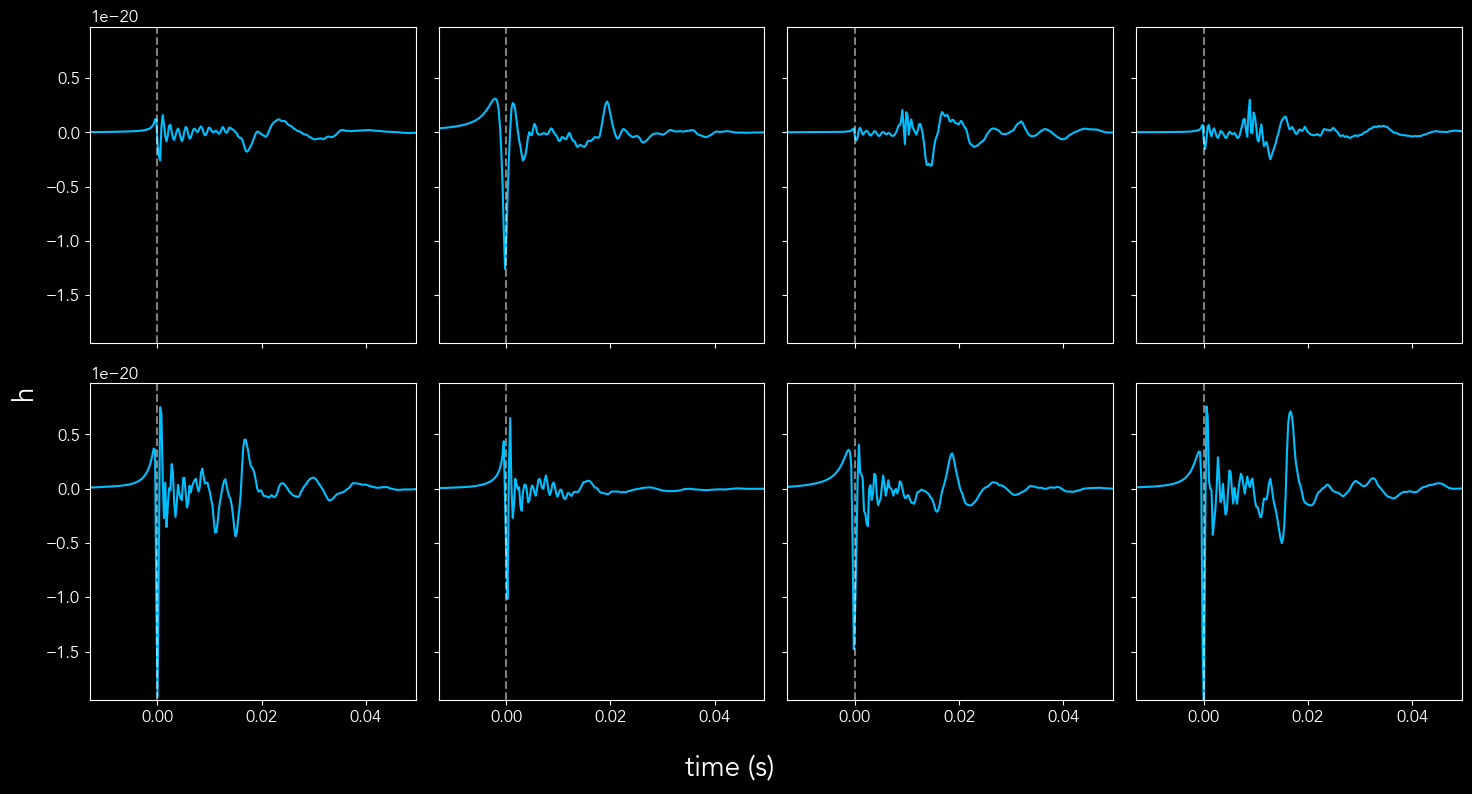

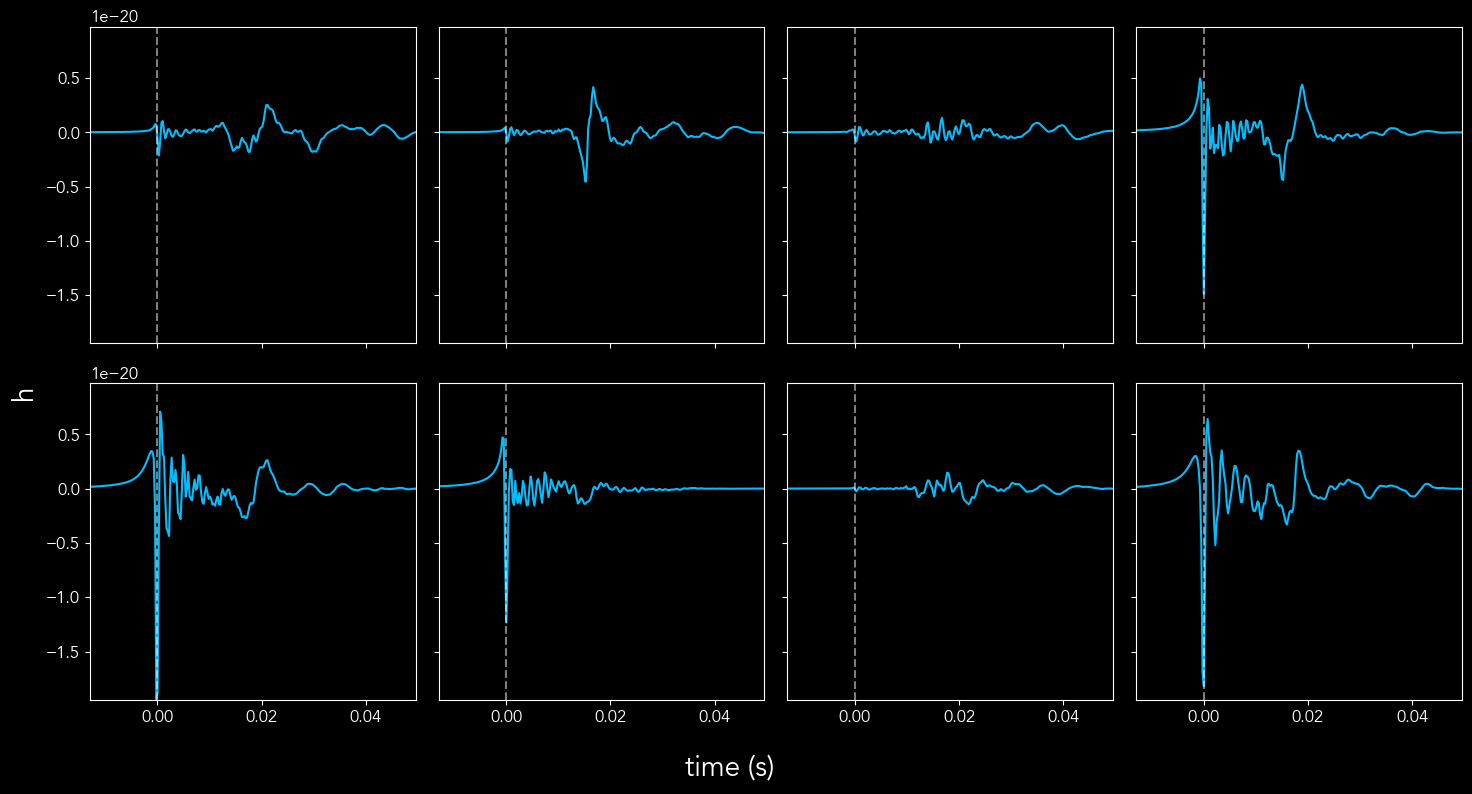

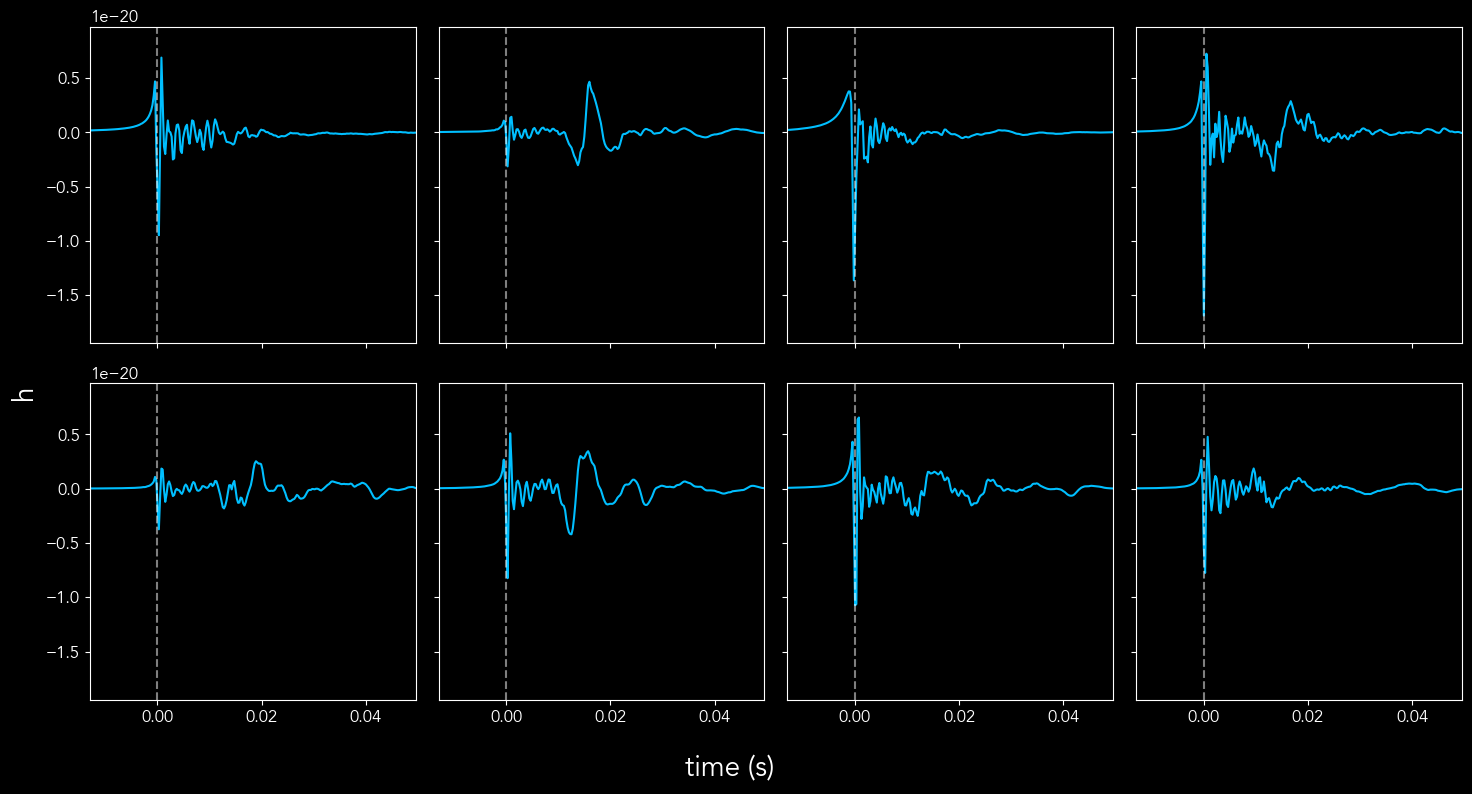

  Generated 10/15 frames


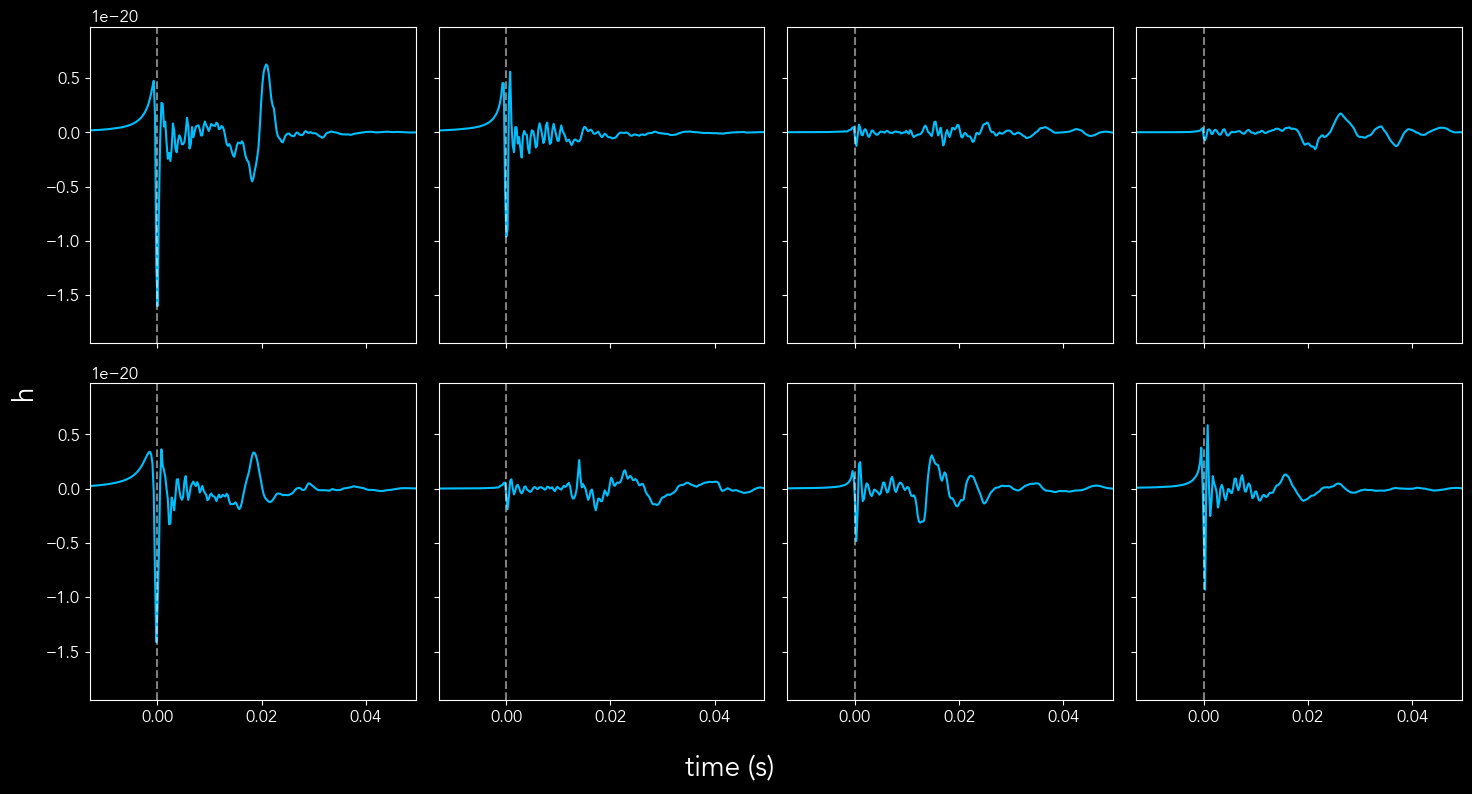

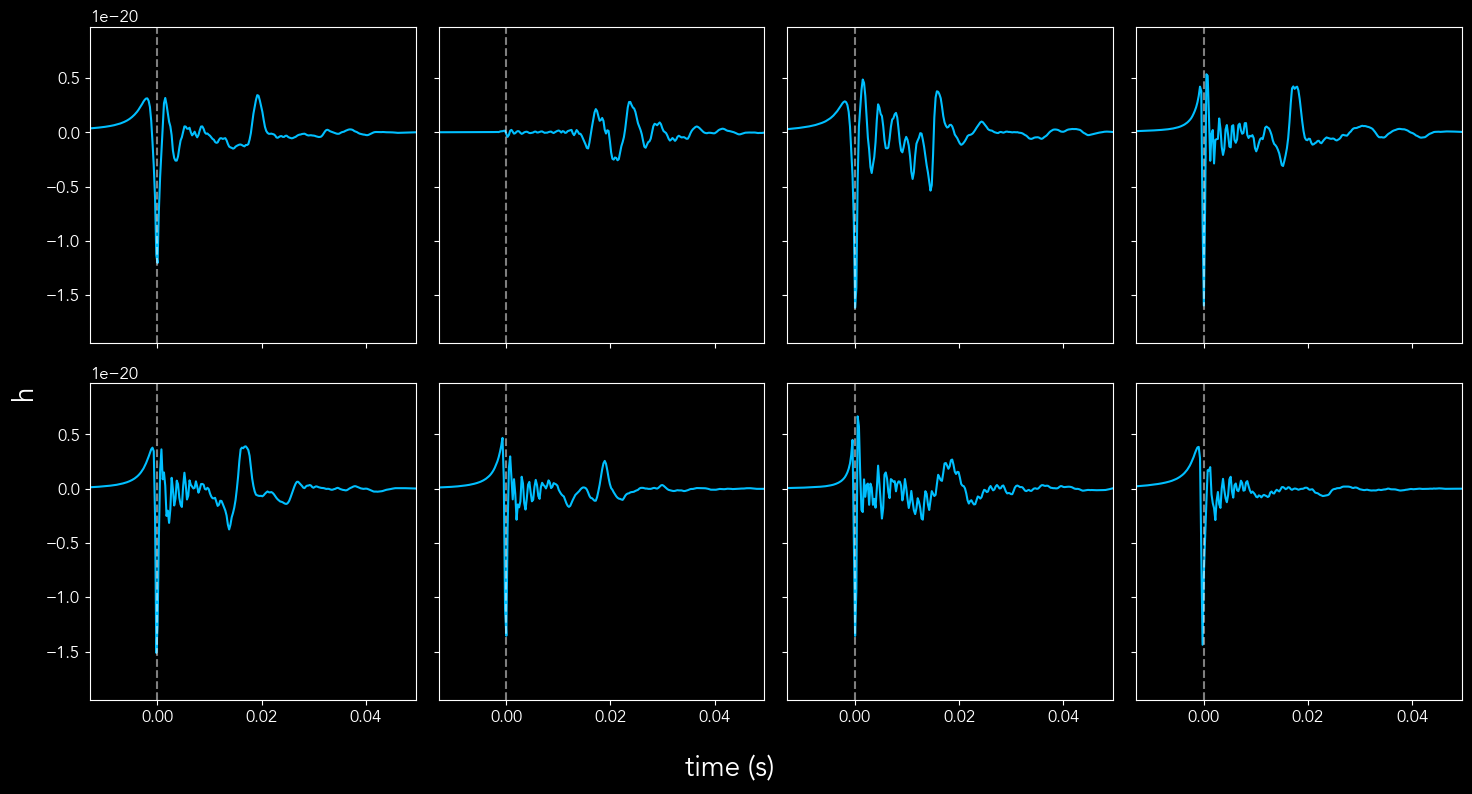

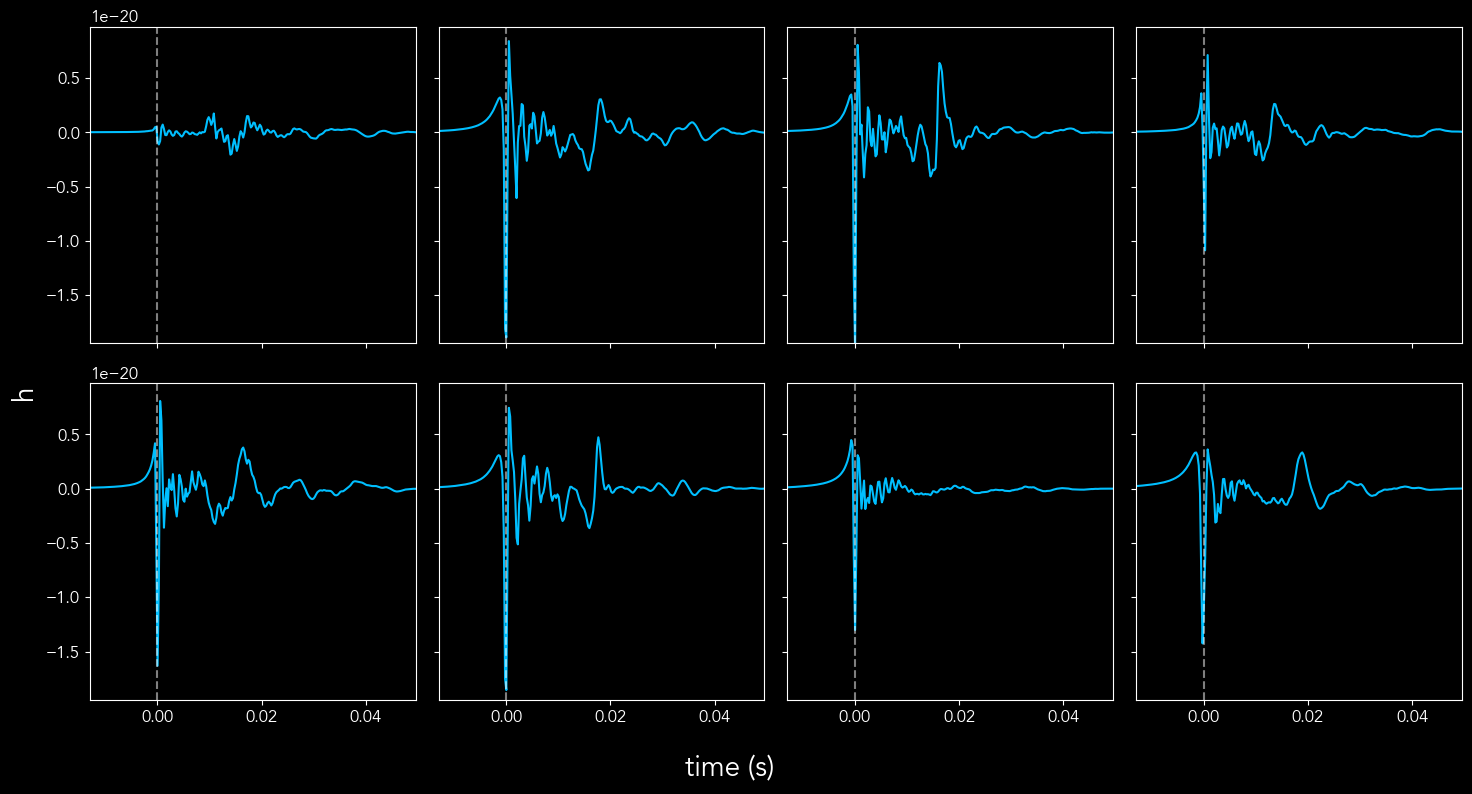

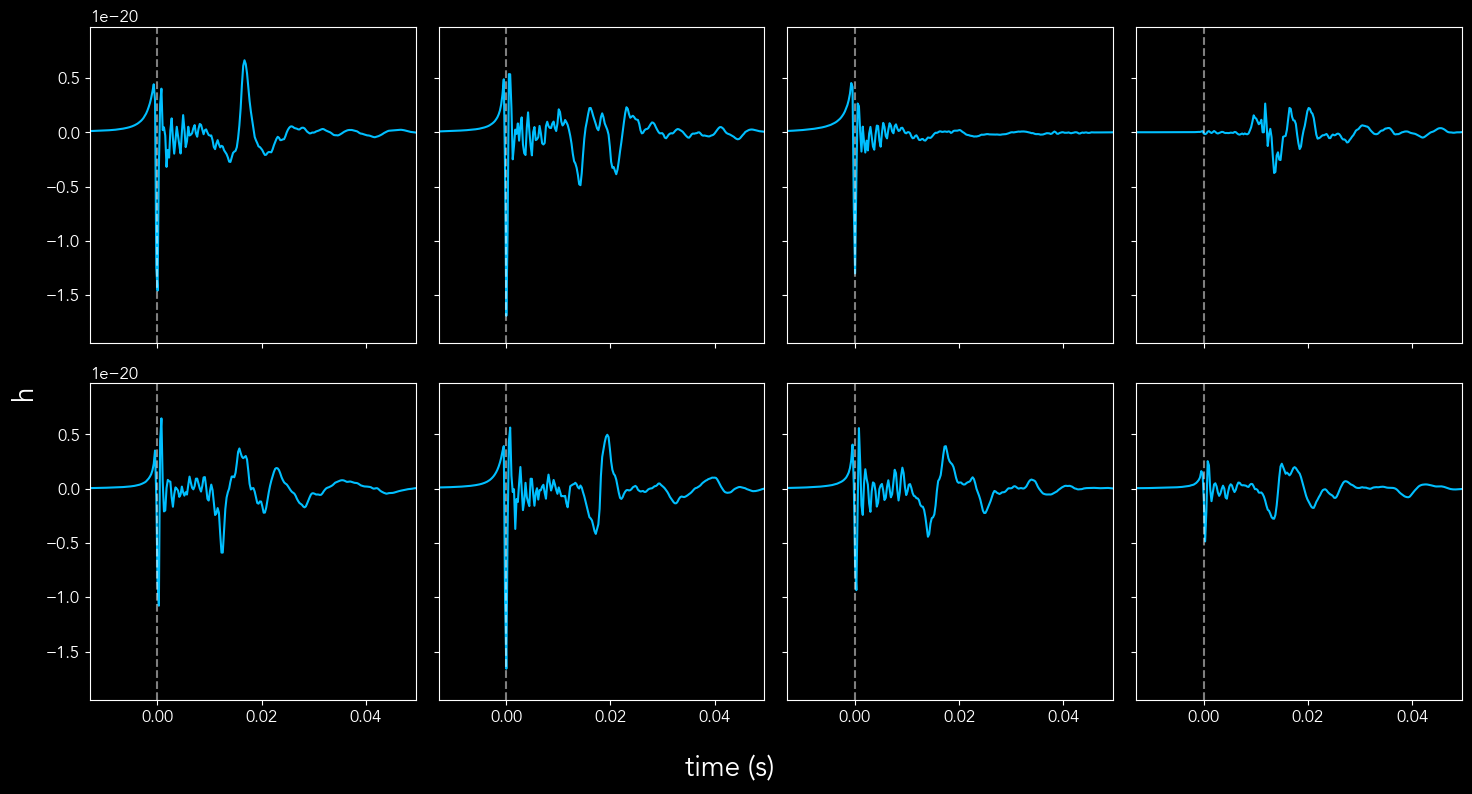

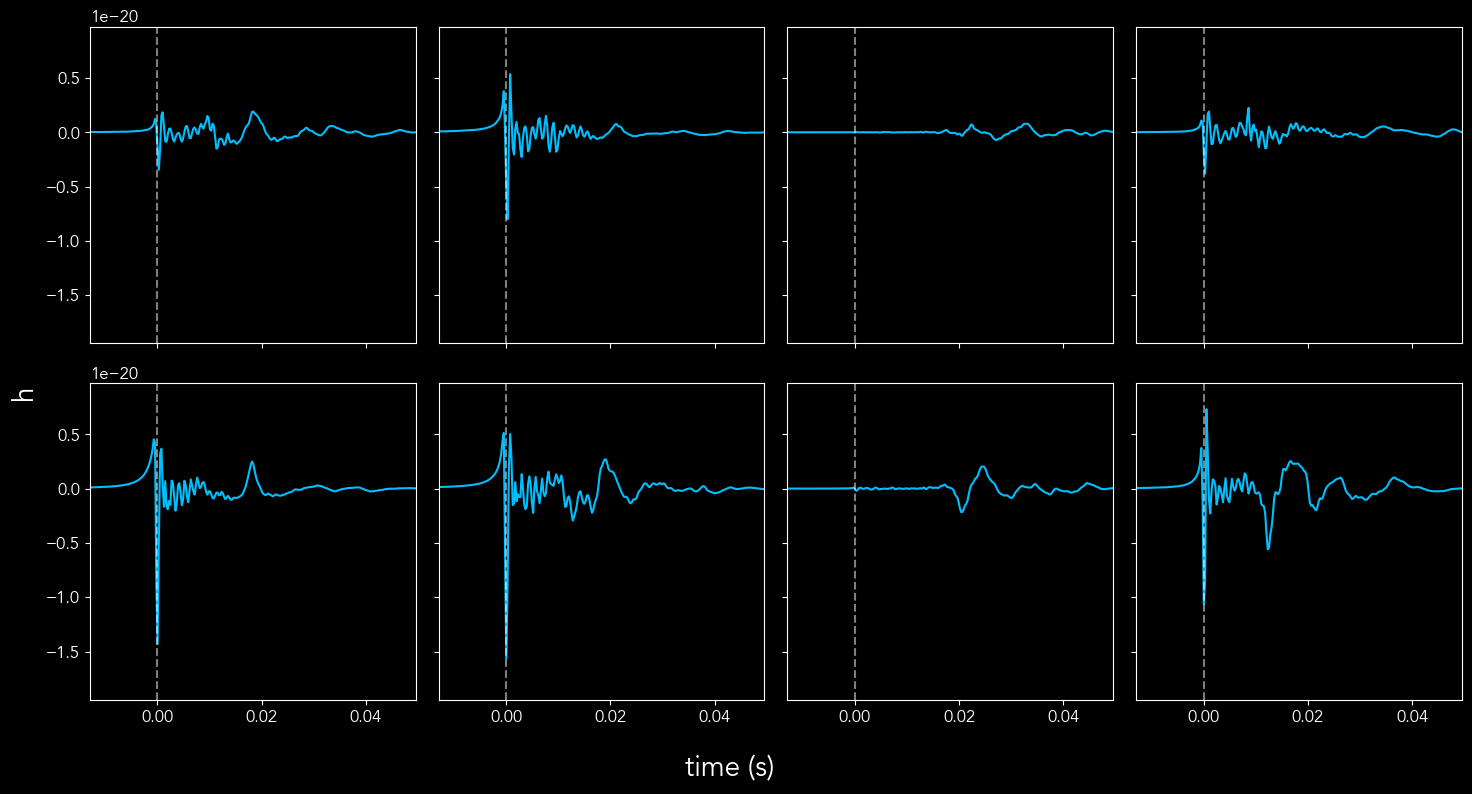

  Generated 15/15 frames
Saving GIF to plots/signal_grid_animation.gif...
GIF created successfully with 15 frames!
GIF created successfully with 15 frames!


In [13]:
# Create an animated GIF showing different random samples of signals
from starccato_flow.plotting.plotting import create_signal_grid_gif

# Create GIF with 15 frames, each showing 8 randomly sampled signals
create_signal_grid_gif(
    dataset=dataset,
    num_frames=15,
    num_signals_per_frame=8,
    num_cols=4,
    num_rows=2,
    fname="plots/signal_grid_animation.gif",
    background="black",
    font_family="sans-serif",
    font_name="Avenir",
    duration=3000,  # 1000ms (1 second) per frame
    seed=42  # For reproducibility
)

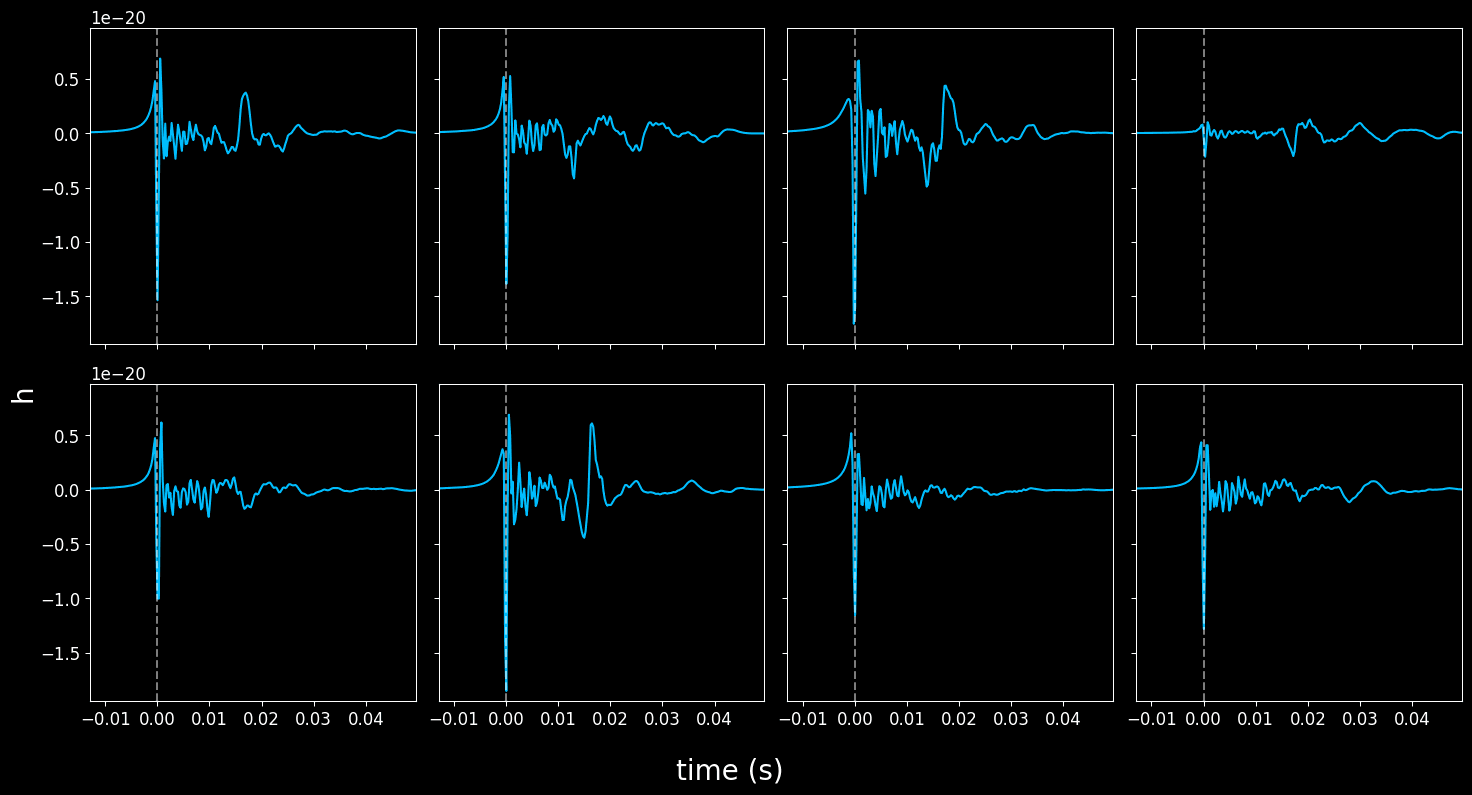

In [14]:
# Display the created GIF in the notebook
from IPython.display import Image as IPImage, display

display(IPImage(filename="plots/signal_grid_animation.gif"))

## Test Parameter Distribution Plots

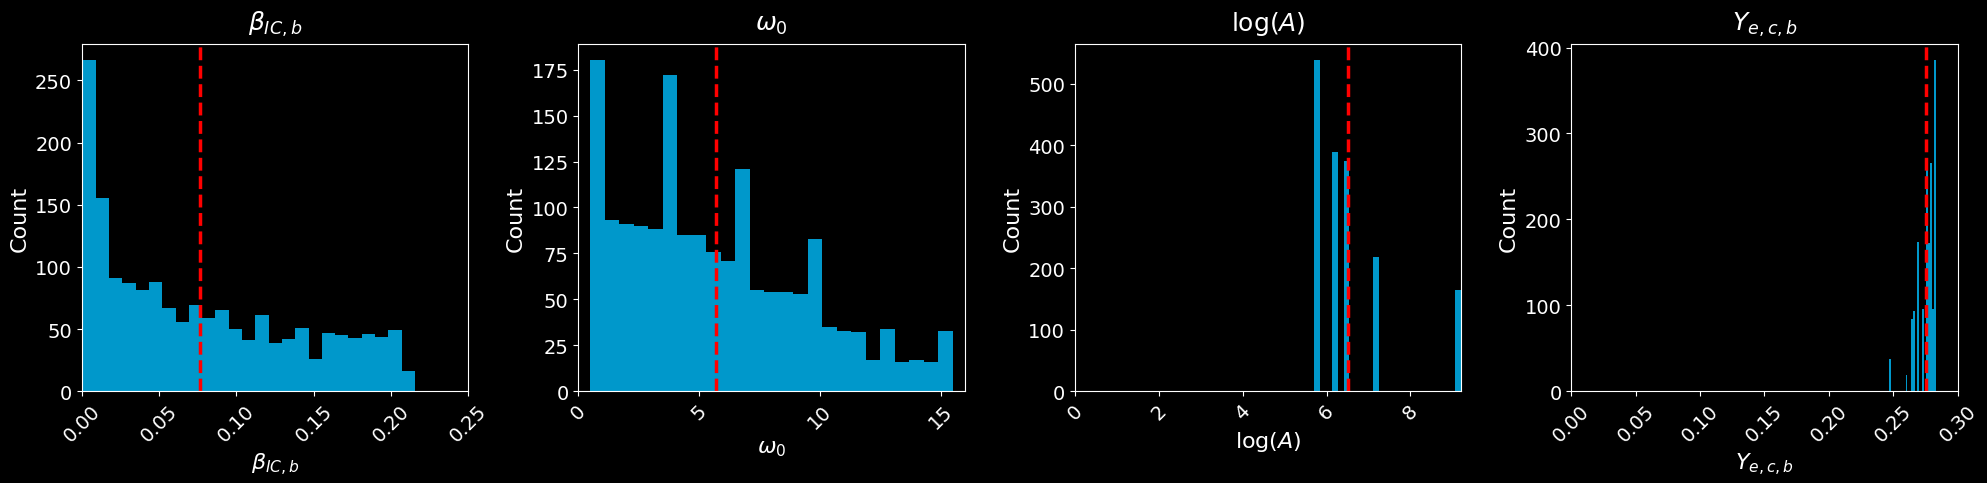

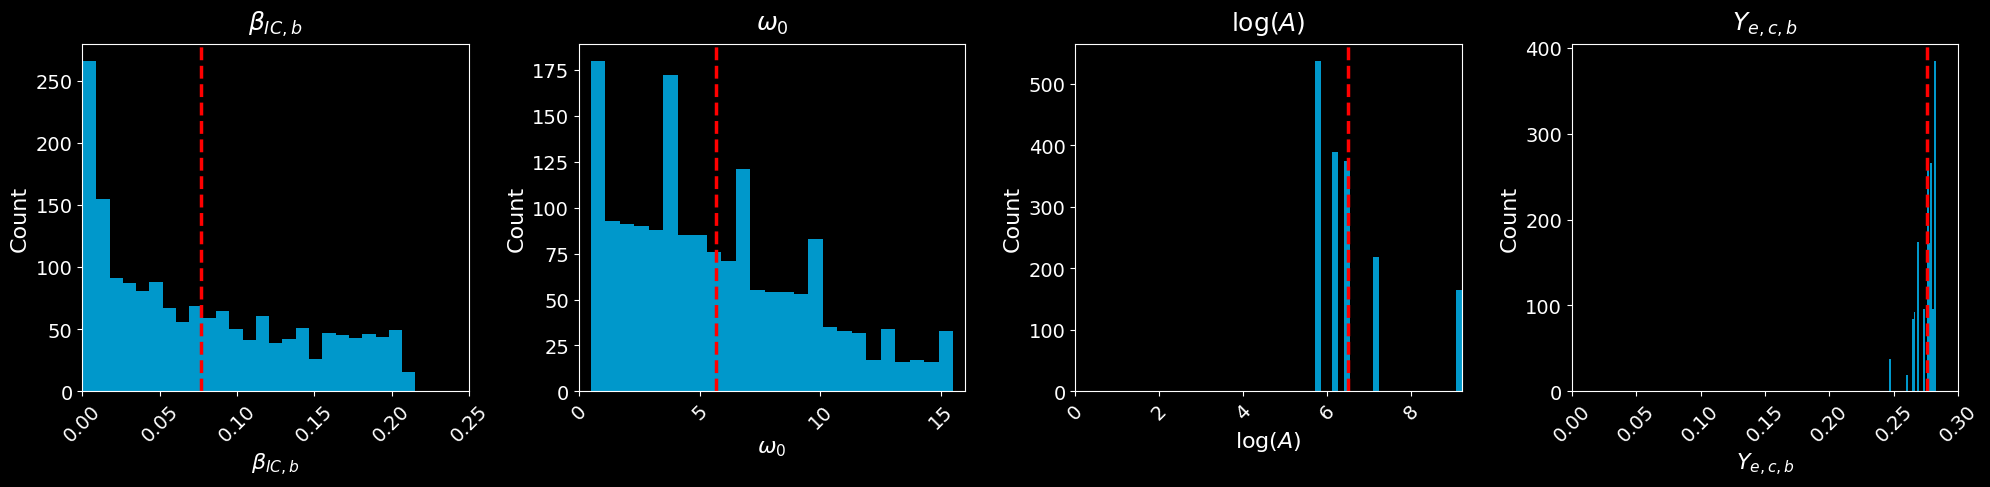

In [15]:
dataset.plot_parameter_distributions_grid(background="black", fname="plots/parameter_distribution_grid.svg")

In [22]:
create_snr_variation_gif(signal_index=500, background="black", dataset=dataset, fname="plots/changing_snr_0.gif")

Creating SNR variation GIF from SNR=200 to SNR=10...
  Generated 5/20 frames
  Generated 5/20 frames
  Generated 10/20 frames
  Generated 10/20 frames
  Generated 15/20 frames
  Generated 15/20 frames
  Generated 20/20 frames
Saving GIF to plots/changing_snr_0.gif...
  Generated 20/20 frames
Saving GIF to plots/changing_snr_0.gif...
GIF created successfully with 20 frames!
GIF created successfully with 20 frames!
